In [16]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [11]:
!jt -r

Reset css and font defaults in:
C:\Users\Vin\.jupyter\custom &
C:\Users\Vin\AppData\Roaming\jupyter\nbextensions


In [18]:
!jt -t monokai

### Analyzing the first 10 million digits of pi: Randomness within structure   
dataset - https://introcs.cs.princeton.edu/java/data/   

```
Benford's Law
```


In [3]:
import requests
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [12]:
url = b"https://introcs.cs.princeton.edu/java/data/pi-10million.txt"
response = requests.get(url)
data = response.text
cnts = Counter(data)

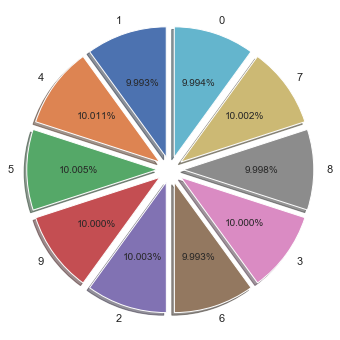

In [14]:
explode = [0.1]*len(cnts.keys())
fig, ax = plt.subplots(figsize=(6,6))
digits_dist = ax.pie(list(cnts.values()), explode=explode, 
                     labels=list(cnts.keys()), autopct='%1.3f%%',
                     shadow=True, startangle=90);

## Solving 24 game

In [17]:
import operator
from itertools import product, permutations
 
syms = [operator.add, operator.sub, operator.mul, mydiv]

def mydiv(n, d):
    return n / d if d != 0 else 9999999

op = {sym: ch for sym, ch in zip(syms, '+-*/')}

def solve24(nums):
    for x, y, z in product(syms, repeat=3):
        for a, b, c, d in permutations(nums):
            if round(x(y(a,b),z(c,d)),5) == 24:
                return f"({a} {op[y]} {b}) {op[x]} ({c} {op[z]} {d})"
            elif round(x(a,y(b,z(c,d))),5) == 24:
                return f"{a} {op[x]} ({b} {op[y]} ({c} {op[z]} {d}))"
            elif round(x(y(z(c,d),b),a),5) == 24:
                return f"(({c} {op[z]} {d}) {op[y]} {b}) {op[x]} {a}"
            elif round(x(y(b,z(c,d)),a),5) == 24:
                return f"({b} {op[y]} ({c} {op[z]} {d})) {op[x]} {a}"
    return '--Not Found--'

In [16]:
if __name__ == '__main__':
    #nums = eval(input('Four integers in the range 1:9 inclusive, separated by commas: '))
    for nums in [
        [1,1,1,1],
        [2,2,2,2],
        [3,3,3,3],
        [4,4,4,4],
        [5,5,5,5],
        [6,6,6,6],
        [7,7,7,7],
        [8,8,8,8],
        [9,9,9,9],  
            ]:
        print(f"solve24({nums}) -> {solve24(nums)}")

solve24([1, 1, 1, 1]) -> --Not Found--
solve24([2, 2, 2, 2]) -> --Not Found--
solve24([3, 3, 3, 3]) -> ((3 * 3) * 3) - 3
solve24([4, 4, 4, 4]) -> (4 + 4) + (4 * 4)
solve24([5, 5, 5, 5]) -> (5 * 5) - (5 / 5)
solve24([6, 6, 6, 6]) -> (6 + 6) + (6 + 6)
solve24([7, 7, 7, 7]) -> --Not Found--
solve24([8, 8, 8, 8]) -> --Not Found--
solve24([9, 9, 9, 9]) -> --Not Found--


# Interview questinos

```
Q1: We have two types of reviewers: careful reviewer (80% of  reviewers) and lazy reviewers (20% of reviewers). Careful reviewers give good reviews 60% of time and bad reviews 40% of time). Lazy reviewers however give good reviews 100% of time. 
1)     Probability of a review being good
```
#### $$
\begin{split}
P(good) &= P(good|Lazy) \times P(Lazy) + P(good|Careful) \times P(Careful)\\
&=1\times 0.2 + 0.6\times 0.8\\
&=0.68
\end{split}
$$

```
2)     Expected number of good reviews in 100 reviews
```
### \\[P(good) \times 100 = 68\\]
```
3)     A reviewer gave 3 good reviews, probability of him/her being lazy reviewer
```
###### $$
\begin{split}
P(Lazy|3 good) &=\frac{P(3 good|Lazy)\times P(Lazy)}{P(3 good)} \\
&= \frac{P(3 good|Lazy)\times P(Lazy)}{P(3 good|Lazy)\times P(Lazy)+P(3 good|Careful)\times P(Careful)}\\
&= \frac{1^3\times 0.2 }{1^3\times 0.2 + 0.6^3\times 0.8} 
\end{split}
$$
```
4)     What would the above probability change as number of good reviews (N) approach infinity
```
### $$ \frac{1^N\times 0.2 }{1^N\times 0.2 + 0.6^N\times 0.8}$$
```
5)     Based on the results, how would you design an approach to classify lazy and careful reviewer 
```


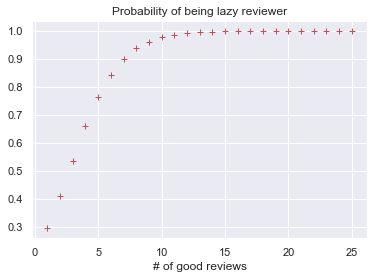

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
def goodreviews(N):
    prob_lazy = []
    for i in range(1,N+1):
        prob_lazy.append(0.2*1/(0.2*1+0.8*0.6**i))
    return prob_lazy
num=25
plt.plot(list(range(1,num+1)),goodreviews(num), 'r+')
plt.title('Probability of being lazy reviewer')
plt.xlabel('# of good reviews');

In [131]:
# of good reviews vs. probability of being lazy reviewer
[(i+1,round(p,5)) for i,p in enumerate(goodreviews(num))]

[(1, 0.29412),
 (2, 0.40984),
 (3, 0.53648),
 (4, 0.65859),
 (5, 0.76275),
 (6, 0.84273),
 (7, 0.8993),
 (8, 0.93704),
 (9, 0.96125),
 (10, 0.97638),
 (11, 0.9857),
 (12, 0.99137),
 (13, 0.9948),
 (14, 0.99688),
 (15, 0.99812),
 (16, 0.99887),
 (17, 0.99932),
 (18, 0.99959),
 (19, 0.99976),
 (20, 0.99985),
 (21, 0.99991),
 (22, 0.99995),
 (23, 0.99997),
 (24, 0.99998),
 (25, 0.99999)]

```python
==============================================
"""
Approach to classify lazy and careful reviewer 
"""
prob_threshold = 0.5
if bad_review:
    reviewer = 'Careful'
elif not bad_review and good_review<3:
    reviewer = 'Careful'
elif not bad_review and good_review>=3:
    reviewer = 'Lazy'    
==============================================   













```

## Assume you have a fair coin.
### Q1: What's expected number of coin flips to get Head, Tail in a row?
### Q2: Expected number of coin flips to get two/three Heads consecutively.

- #### Method 1: Markov Chains Transition Matrices
- #### Method 2: Monte Carlo Simulation

### Head, Tail   
_state 0:    
state 1: Head   
state 2: Head, Tail_

|                |     State 0    |     State 1    |     State 2    |
|----------------|----------------|----------------|----------------|
|     State 0    |     0.5        |     0.5        |     0          |
|     State 1    |     0          |     0.5        |     0.5        |
|     State 2    |     0          |     0          |     1          |

\begin{split}
\Phi(0) &= 0.5 \times (1+\Phi(0))+ 0.5 \times (1+\Phi(1))\\
\Phi(1) &= 0.5 \times (1+\Phi(1))+ 0.5 \times (1+\Phi(2))\\
\Phi(2) &=0 
\end{split}
<font color='red' size= "4">
\begin{split}
\Phi(0) = 4
\end{split}
</font> 

---


### Head, Head
_state 0:    
state 1: Head   
state 2: Head, Head_

|                |     State 0    |     State 1    |     State 2    |
|----------------|----------------|----------------|----------------|
|     State 0    |     0.5        |     0.5        |     0          |
|     State 1    |     0.5        |     0          |     0.5        |
|     State 2    |     0          |     0          |     1          |


\begin{split}
\Phi(0) &= 0.5 \times (1+\Phi(0))+ 0.5 \times (1+\Phi(1))\\
\Phi(1) &= 0.5 \times (1+\Phi(0))+ 0.5 \times (1+\Phi(2))\\
\Phi(2) &=0 
\end{split}

<font color='red' size= "4">
\begin{split}
\Phi(0) = 6
\end{split}
</font>  


In [14]:
import numpy as np

def flip_coin(p=0.5):
    """ Simulate a coin flipping of a given probability p.
    Parameters:
        p: Parameter of the distribution, >= 0 and <=1.
    Returns:
        "H" or "T" (string) 
    """
    return "H" if np.random.binomial(1, p, 1) == 1 else "T"

def flip_pattern(end_pattern=['H', 'T'], print_opt=False):
    """ One experiment of given ending pattern 
    Parameters:
        end_pattern: Pattern to end simulation (list)
        print_opt: Option to print flipping sequence (boolean)
    Returns:
        current_index: Number of flips before stop (int)
    """    
    flip_list, current_index, current_condition= [], 0, None    
    while current_condition != end_pattern:
        flip_list.append(flip_coin())
        if len(flip_list) >= len(end_pattern):
            current_condition = flip_list[-len(end_pattern):]
        else:
            pass
        current_index +=1        
    if print_opt:
        print(flip_list)
    return current_index 

In [22]:
[flip_pattern(['H', 'H'], print_opt=True) for _ in range(10)]

['T', 'H', 'H']
['T', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H']
['H', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H']
['H', 'H']
['H', 'H']
['T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H']
['H', 'H']
['T', 'T', 'H', 'T', 'H', 'H']
['H', 'T', 'T', 'H', 'T', 'H', 'H']
['T', 'H', 'H']


[3, 12, 10, 2, 2, 10, 2, 6, 7, 3]

In [23]:
np.mean([flip_pattern(['H', 'T']) for _ in range(10000)])

4.0096

In [24]:
np.mean([flip_pattern(['H', 'H']) for _ in range(10000)])

5.9514

In [25]:
np.mean([flip_pattern(['H', 'H', 'H']) for _ in range(10000)])

14.1069

In [9]:
np.mean([flip_pattern(['H', 'H', 'H', 'H', 'H']) for _ in range(10000)])

62.1253

## Expected number of coin flips to get N Heads in a row:

# $$ 2 \times (2^N-1) $$


      

coin tossing sequence: HTHTHT

# Find magic number N that meets the criteria: 
# N, 2N, 3N, 4N, 5N and 6N have the same digits.

```
N  = abcde
2N = bcaed
3N = cdaeb
...





















```